In [350]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing 
from keras import losses, optimizers
import pandas as pn
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [351]:
# np.random.seed(10)

In [352]:
data = pn.read_csv('pd.csv')
data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.64310,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,1,72,0,12.66600,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
2,1,72,0,19.68100,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
3,1,72,0,25.64700,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,72,0,33.64200,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
5,1,72,0,40.65200,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
6,1,72,0,47.64900,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
7,1,72,0,54.64000,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
8,1,72,0,61.66900,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370
9,1,72,0,68.68800,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.201170


In [353]:
y1 = data[['motor_UPDRS']]
x1 = data.drop(['subject#','motor_UPDRS', 'total_UPDRS'], axis=1)

y = pn.DataFrame.as_matrix(y1)
x = pn.DataFrame.as_matrix(x1)

In [354]:
epochs = 50

In [355]:
x, x.shape

(array([[  7.20000000e+01,   0.00000000e+00,   5.64310000e+00, ...,
           4.18880000e-01,   5.48420000e-01,   1.60060000e-01],
        [  7.20000000e+01,   0.00000000e+00,   1.26660000e+01, ...,
           4.34930000e-01,   5.64770000e-01,   1.08100000e-01],
        [  7.20000000e+01,   0.00000000e+00,   1.96810000e+01, ...,
           4.62220000e-01,   5.44050000e-01,   2.10140000e-01],
        ..., 
        [  6.10000000e+01,   0.00000000e+00,   1.56820000e+02, ...,
           4.77920000e-01,   5.78880000e-01,   1.41570000e-01],
        [  6.10000000e+01,   0.00000000e+00,   1.63730000e+02, ...,
           5.68650000e-01,   5.63270000e-01,   1.42040000e-01],
        [  6.10000000e+01,   0.00000000e+00,   1.70730000e+02, ...,
           5.86080000e-01,   5.70770000e-01,   1.53360000e-01]]), (5875, 19))

In [356]:
y, y.shape

(array([[ 28.199],
        [ 28.447],
        [ 28.695],
        ..., 
        [ 21.495],
        [ 21.007],
        [ 20.513]]), (5875, 1))

In [357]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.33, random_state = 1)

In [358]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [359]:
x_train.shape, y_train.shape

((3936, 19), (3936, 1))

In [360]:
x_test.shape, y_test.shape

((1939, 19), (1939, 1))

In [361]:
model = Sequential()
model.add(Dense(65, activation='sigmoid', input_dim=19))
# model.add(Dense(65, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(units=1))

In [362]:
model.compile(optimizer='adam',
              loss='mae', metrics=['mae'])

In [363]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 65)                1300      
_________________________________________________________________
dense_58 (Dense)             (None, 20)                1320      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 21        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [364]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.33)


Train on 2637 samples, validate on 1299 samples
Epoch 1/50
2637/2637 [==============================] - 0s - loss: 19.1432 - mean_absolute_error: 19.1432 - val_loss: 17.9813 - val_mean_absolute_error: 17.9813
Epoch 2/50
2637/2637 [==============================] - 0s - loss: 16.9303 - mean_absolute_error: 16.9303 - val_loss: 16.5089 - val_mean_absolute_error: 16.5089

In [365]:
model.evaluate(x_test, y_test)

1568/1939 [=======================>......] - ETA: 0s

[5.5660574511193071, 5.5660574511193071]

In [367]:
model.evaluate(x_train, y_train)

3232/3936 [=======================>......] - ETA: 0s

[5.3483642407549103, 5.3483642407549103]

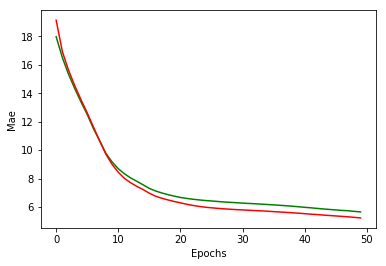

In [368]:
train_accuracy= history.history['mean_absolute_error']
train_loss = history.history['loss']
validation_accuracy = history.history['val_mean_absolute_error']
validation_loss = history.history['val_loss']
epochs = history.epoch
plt.xlabel("Epochs")
plt.ylabel("Mae")
plt.plot(epochs, validation_accuracy, c='green')
plt.plot(epochs, train_accuracy, c='red')